<a href="https://colab.research.google.com/github/aryannuka/data-science/blob/main/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

The system shows limited success because its results lack precision and perform better when processing data from different elpd_loo models. It compares other models to find differences and weaknesses.

**Task2**:

Describe overfitting, in the context of this course

In this course context overfitting occurs when the model handles excessive data which makes it fail with fresh samples because it stores initial patterns instead of grasping the true process.

**Task3**:

How do we mitigate overfitting?

Our models perform better when they use fewer variables and simpler assumptions about the process. When models receive unnecessary strong priors they lose their ability to predict the correct variables.

**Task4**:

How do we mitigate underfitting?

We solve underfitting by choosing a model with a suitable elpd_loo score. We can find this value by combining a elpd_loo model with another model to measure accuracy.

**Task5**:

Why would we want more than one predictor in a model?

Our model needs multiple predictors to generate better results and explain its output. A single thing usually depends on several possible values like how a basketball player's field goal percentage changes based on their height and position.

**Task6**:

Can we have too many predictors? How would we now?

When you have too many predictors the model can become too specific to its training data. Our model performance shows if it matches the predictor data but fails to match real-world process patterns. Our predictors are probably unnecessary when we find correlations that don't match real-world behavior.

**Task7**:

What is variable selection, and how does it work?

Variable selection is to choose which variables from our dataset should become predictors in our model. The method selects the minimum number of variables that produce accurate model results. This technique helps prevent model overfitting while keeping a well-performing model.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The initial model would apply one slope value across all categories while adjusting the intercepts for each group. Our second model lets each category have its own slope value plus distinct intercepts. Our third model design would work like the second model but show how the non-categorical data affects each category.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Our model contains so many inputs and outputs that we cannot display all of it in one graph. We can build a 2D graph by fixing all predictors except one to study the connection between that predictor and the outcome. These tools help us evaluate multiple models but they work better for comparison than for visualization purposes.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.4 MB/s eta 0:00:00


In [2]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

<ipython-input-3-bb9f7b7913fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)


In [4]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [5]:
ft_pos_hie = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 30 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
ft_pos_fre = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [7]:
ft_pos_poi = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
ft_pos_poi_interact = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

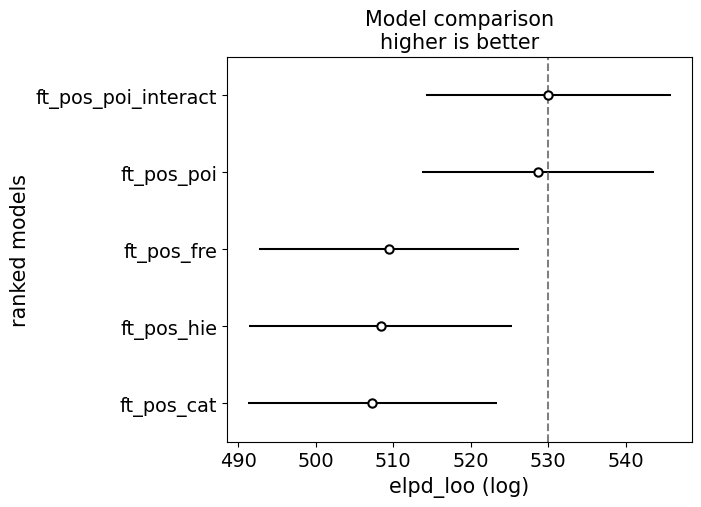

In [9]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_hie":ft_pos_hie, "ft_pos_fre":ft_pos_fre, "ft_pos_poi":ft_pos_poi, "ft_pos_poi_interact":ft_pos_poi_interact})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The two models that use 3 point attempts show similar accuracy but the model that links 3 point attempts to player position performs better than the other. The accuracy of 3 point shot predictions helps determine player ability better than free throw stats because this metric handles multiple performance aspects. The number of 3-point shots a player takes shows their skill level since weaker players avoid taking these shots. The model that uses 3 point shots and player position achieves better results than the model that includes all three predictors due to overfitting. When the model receives additional predictor variables it produces inaccurate results.